In [13]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications import imagenet_utils
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
import pandas as pd
from keras.models import Model
import keras
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.layers import Dense,Activation,Flatten,MaxPool2D,Conv2D,Dropout
from keras.layers.normalization import BatchNormalization
import keras.backend as K
import itertools
%matplotlib inline

# Load the Data

In [14]:
from keras.datasets import cifar10
(X_train,y_train),(X_test, y_test) = cifar10.load_data()

In [10]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_test.shape

(10000, 1)

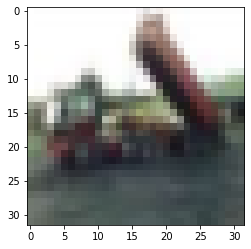

In [9]:
plt.imshow(X_train[2])

In [10]:
#label of above image
y_train[2]

array([9], dtype=uint8)

# Preprocessing : 
### One hot encode

In [15]:
y_train_one_hot = to_categorical(y_train,10)
y_test_one_hot = to_categorical(y_test,10)

### Normalize the pixels

In [16]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

## CNN

In [6]:
K.clear_session()
model=Sequential()

model.add(Conv2D(32, (3,3),  input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 128)         147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 128)        

In [42]:
model.compile(Adam(lr=0.0001),
              loss='categorical_crossentropy',        
              metrics=['accuracy'])

## Training


In [114]:
epochs = 25
history = model.fit(X_train,
          y_train_one_hot,
          batch_size=32,
          epochs=epochs, 
          validation_split=0.3)

Train on 35000 samples, validate on 15000 samples
Epoch 1/25
35000/35000 [==============================] - 64s 2ms/step - loss: 0.1403 - accuracy: 0.9559 - val_loss: 1.5053 - val_accuracy: 0.6877
Epoch 2/25
35000/35000 [==============================] - 61s 2ms/step - loss: 0.1312 - accuracy: 0.9595 - val_loss: 1.5545 - val_accuracy: 0.6830
Epoch 3/25
35000/35000 [==============================] - 63s 2ms/step - loss: 0.1238 - accuracy: 0.9606 - val_loss: 1.6029 - val_accuracy: 0.6815
Epoch 4/25
35000/35000 [==============================] - 62s 2ms/step - loss: 0.1132 - accuracy: 0.9658 - val_loss: 1.6178 - val_accuracy: 0.6857
Epoch 5/25
35000/35000 [==============================] - 62s 2ms/step - loss: 0.1046 - accuracy: 0.9675 - val_loss: 1.6965 - val_accuracy: 0.6790
Epoch 6/25
35000/35000 [==============================] - 62s 2ms/step - loss: 0.0944 - accuracy: 0.9712 - val_loss: 1.6768 - val_accuracy: 0.6894
Epoch 7/25
35000/35000 [==============================] - 59s 2ms/st

## Evaluate

In [115]:
model.evaluate(X_test,y_test_one_hot)

10000/10000 [==============================] - 7s 663us/step


[2.36344660320282, 0.679099977016449]

## Visualize Accuracy and Loss 

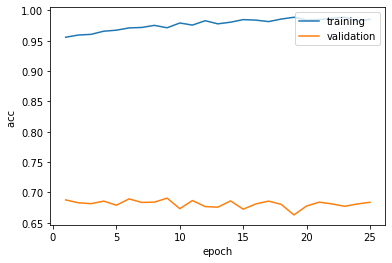

In [116]:
#Accuracy

epoch_nums = range(1, epochs+1)
training_acc = history.history["accuracy"]
validation_acc = history.history["val_accuracy"]
plt.plot(epoch_nums , training_acc)
plt.plot(epoch_nums , validation_acc)
plt.xlabel('epoch')
plt.ylabel('acc ')
plt.legend(['training','validation'], loc='upper right')
plt.show()

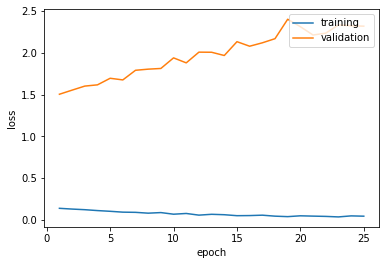

In [117]:
epoch_nums = range(1, epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums , training_loss)
plt.plot(epoch_nums , validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training','validation'], loc='upper right')
plt.show()

In [26]:
model.save('cifarcnn.h5')

In [18]:
from keras.models import load_model
new_model = load_model('cifarcnn.h5')

new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 128)         147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 128)        

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


## Prediction on images

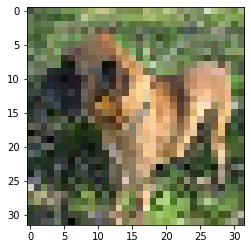

In [31]:
img_pred = image.load_img('dog.11.jpg', target_size=(32,32,3))
plt.imshow(img_pred)
img_pred = image.img_to_array(img_pred)
img_pred = np.expand_dims(img_pred, axis=0)

In [32]:
#Get the probabilities

probabilities = model.predict(img_pred)
probabilities 

array([[1.8061929e-14, 3.9902517e-10, 5.4902085e-12, 3.0047431e-09,
        9.2676799e-20, 9.8900956e-01, 1.0988034e-02, 1.7415201e-07,
        1.5487395e-06, 6.3873335e-07]], dtype=float32)

In [33]:
class_name =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

index = np.argsort(probabilities[0,:])
print('Most likely class :', class_name[index[9]] , ', Probability : ', probabilities[0 , index[9]])
print('Most second  likely class :', class_name[index[8]] , ', Probability : ', probabilities[0 , index[8]])
print('Most third  likely class :', class_name[index[7]] , ', Probability : ', probabilities[0 , index[7]])




Most likely class : dog , Probability :  0.98900956
Most second  likely class : frog , Probability :  0.010988034
Most third  likely class : ship , Probability :  1.5487395e-06
